<a href="https://colab.research.google.com/github/ougrid/my-knowledge-resource/blob/master/Data_preprocessed_with_plotting_by_Boss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [ ]:
import gdown
url = "https://drive.google.com/drive/folders/1KqoqrvgEcfXQq4FNxoDfmMA1bft9McdI?usp=share_link"
gdown.download_folder(url, quiet=True)

['/content/data/nobody.npy',
 '/content/data/stand.npy',
 '/content/data/walk.npy']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm import trange

In [ ]:
nobody   = np.load("data/nobody.npy")
standing = np.load("data/stand.npy")
walking  = np.load("data/walk.npy")
print(nobody.shape)
print(standing.shape)
print(walking.shape)
print("60 second of record with 255 FPS")
print("60 second x 255 frame per second ="+str(60*255))

(15300, 112)
(15300, 112)
(15300, 112)
60 second of record with 255 FPS
60 second x 255 frame per second =15300


In [ ]:
# I/Q data reader 
max_data = 600
def IQdata(datas):
    iq_vecs = []
    for data in datas:
        data_length = len(data)
        i_vec = np.array(data[:data_length//2])
        q_vec = np.array(data[data_length//2:])
        iq_vec = i_vec + 1j*q_vec
        iq_vecs.append(iq_vec)
    return np.stack(iq_vecs[:max_data])

IQ_nobody   = IQdata(nobody)
IQ_standing = IQdata(standing)
IQ_walking  = IQdata(walking)

print(IQ_nobody.shape)
print(IQ_standing.shape)
print(IQ_walking.shape)
print("56 Range bits of 2.8 meter of distance")

(600, 56)
(600, 56)
(600, 56)
56 Range bits of 2.8 meter of distance


In [ ]:
#Range time data
def range_time(IQ_data):
    n_rd_history = 255
    frame = []
    frames = []

    for iqini in IQ_data:
        if len(frame)<n_rd_history:
            frame.append(iqini)
        else:  
            frames.append(np.copy(frame))
            frame.append(iqini)
            frame = frame[1::]
            
    return np.stack(frames)

Range_time_nobody   = range_time(IQ_nobody)
Range_time_standing = range_time(IQ_standing)
Range_time_walking  = range_time(IQ_walking)

print(Range_time_nobody.shape)
print(Range_time_standing.shape)
print(Range_time_walking.shape)

(345, 255, 56)
(345, 255, 56)
(345, 255, 56)


In [ ]:
import scipy.fftpack as fft
#Range frequency data
def Range_frequency(datas):
    Range_frequency_frame = []
    for data in datas:
        dB = True
        # Range-Doppler
        rd = fft.fft(data, axis=0)
        rd = fft.fftshift(rd, axes=0)
        rd = abs(rd)
        DBrd = 20 * np.log10(rd+1e-10)
        Range_frequency_frame.append(DBrd)
    return np.stack(Range_frequency_frame)

Range_frequency_nobody   = Range_frequency(Range_time_nobody)
Range_frequency_standing = Range_frequency(Range_time_standing)
Range_frequency_walking  = Range_frequency(Range_time_walking)

print(Range_frequency_nobody.shape)
print(Range_frequency_standing.shape)
print(Range_frequency_walking.shape)

(345, 255, 56)
(345, 255, 56)
(345, 255, 56)


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[]

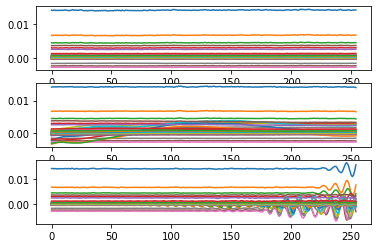

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,1)
ax[0].plot(Range_time_nobody[0])
ax[1].plot(Range_time_standing[0])
ax[2].plot(Range_time_walking[0])

plt.plot()

  0%|          | 0/50 [00:00<?, ?it/s]


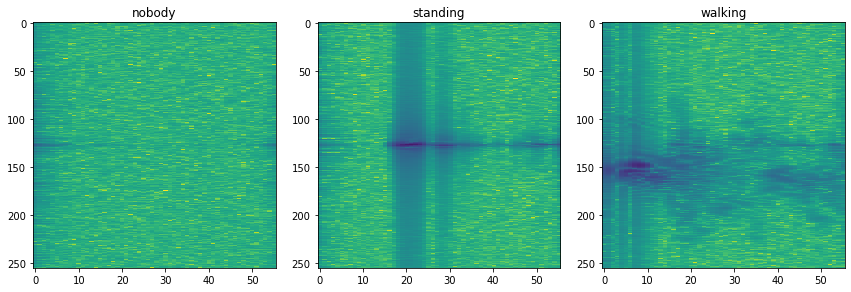

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
from tqdm import tqdm

fig, ax = plt.subplots(1,3, figsize=(12, 4))
fig.tight_layout()
ax[0].title.set_text("nobody")
ax[1].title.set_text("standing")
ax[2].title.set_text("walking")

total = len(Range_time_nobody)
pbar = tqdm(total=total)
def animate(i):
    lines = []
    lines.append(ax[0].imshow(np.abs(Range_frequency_nobody[i]), interpolation='none',aspect='auto'))  # update the data.
    lines.append(ax[1].imshow(np.abs(Range_frequency_standing[i]), interpolation='none',aspect='auto'))
    lines.append(ax[2].imshow(np.abs(Range_frequency_walking[i]), interpolation='none',aspect='auto'))
    pbar.update(1)
    return lines
pbar.close()

ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=total)

#ani.save("save.mp4") slow

In [ ]:
!mkdir save

In [ ]:
for i in trange(len(Range_time_nobody)):
    fig, ax = plt.subplots(4,3, figsize=(12, 12))
    #fig.tight_layout()
    ax[0][0].title.set_text("nobody")
    ax[0][1].title.set_text("standing")
    ax[0][2].title.set_text("walking")

    ax[0][0].set_ylabel("freq graph")
    ax[1][0].set_ylabel("time graph")
    ax[2][0].set_ylabel("freq image")
    ax[3][0].set_ylabel("time image")

    ax[0][0].plot(np.abs(Range_frequency_nobody[i]))
    ax[0][1].plot(np.abs(Range_frequency_standing[i]))
    ax[0][2].plot(np.abs(Range_frequency_walking[i]))

    ax[1][0].plot(np.abs(Range_time_nobody[i]))
    ax[1][1].plot(np.abs(Range_time_standing[i]))
    ax[1][2].plot(np.abs(Range_time_walking[i]))

    ax[2][0].imshow(np.abs(Range_frequency_nobody[i]), interpolation='none',aspect='auto')
    ax[2][1].imshow(np.abs(Range_frequency_standing[i]), interpolation='none',aspect='auto')
    ax[2][2].imshow(np.abs(Range_frequency_walking[i]), interpolation='none',aspect='auto')
    
    ax[3][0].imshow(np.abs(Range_time_nobody[i]), interpolation='none',aspect='auto')
    ax[3][1].imshow(np.abs(Range_time_standing[i]), interpolation='none',aspect='auto')
    ax[3][2].imshow(np.abs(Range_time_walking[i]), interpolation='none',aspect='auto')

    fig.savefig('./save/'+ str(i) + '.png',dpi=80)
    plt.close()

100%|██████████| 345/345 [06:34<00:00,  1.14s/it]


In [ ]:
#gpu
#!ffmpeg -y -framerate 24 -hwaccel cuda -hwaccel_output_format cuda -i ./save/%01d.png -c:v h264_nvenc save.mp4

In [ ]:
 #cpu
!ffmpeg -y -framerate 24 -i ./save/%d.png -c:v libx264 save.mp4

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open("save.mp4",'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)